![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

In [19]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
chronic_df = pd.read_csv('Dataset/kidney_disease.csv')
chronic_df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years

- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
		  sg - (1.005,1.010,1.015,1.020,1.025)

- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)

-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)

- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)

- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)

- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)

- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)

- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl

- 	11.Blood Urea(numerical)	
		  bu in mgs/dl

- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl

- 	13.Sodium(numerical)
		  sod in mEq/L

- 	14.Potassium(numerical)	
		  pot in mEq/L

- 	15.Hemoglobin(numerical)
		  hemo in gms

- 	16.Packed  Cell Volume(numerical)

- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm

- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm

- 	19.Hypertension(nominal)	
		  htn - (yes,no)

- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)

- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)

- 	22.Appetite(nominal)	
	    appet - (good,poor)

- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	

- 	24.Anemia(nominal)
		  ane - (yes,no)
		  
- 	25.Class (nominal)		
		  class - (ckd,notckd)

In [3]:
# checking info of columns and null values
chronic_df.info()
chronic_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

## **`Data Cleaning`**

In [4]:
# drop id column
chronic_df = chronic_df.drop(columns= 'id', axis = 1)


In [5]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [6]:
chronic_df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                  44                    7800                   5.2   
1                  38                    6000                   NaN   
2                  31                    7500                   NaN   
3                  32                    6700                   3.9   
4                  35                    7300                   4.6   

   hypertension  diabetes_mellitus coronary_artery_disease appetite  \
0           yes                yes                      no     good   
1            no                 no                      no     good   
2            no                yes                      no     poor   
3           yes                 no                      no     poor   
4            no                 no                      no     good   

  peda_edema aanemia class  
0         no      no   ckd  
1         no      no   ckd  
2         no     yes   ckd  
3        yes     yes   ckd  
4         no      no   ckd  

[5 rows x 25 columns]

### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [7]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now

# converting back to nominal data type categorical
chronic_df[['specific_gravity', 'albumin', 'sugar']] = chronic_df[['specific_gravity', 'albumin', 'sugar']].astype('object')



In [8]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type
chronic_df['packed_cell_volume'] = pd.to_numeric(chronic_df['packed_cell_volume'], errors = 'coerce')
chronic_df['white_blood_cell_count'] = pd.to_numeric(chronic_df['white_blood_cell_count'], errors = 'coerce')
chronic_df['red_blood_cell_count'] = pd.to_numeric(chronic_df['red_blood_cell_count'], errors = 'coerce')

In [9]:
# Extracting categorical and numerical columns

cat_cols = [col for col in chronic_df.columns if chronic_df[col].dtype == 'object']
num_cols = [col for col in chronic_df.columns if chronic_df[col].dtype != 'object']


In [10]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [11]:
num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [12]:
# by looping & looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {chronic_df[col].unique()} values\n")


specific_gravity has [1.02 1.01 1.005 1.015 nan 1.025] values

albumin has [1.0 4.0 2.0 3.0 0.0 nan 5.0] values

sugar has [0.0 3.0 4.0 1.0 nan 2.0 5.0] values

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [13]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'].replace({' yes': 'yes', '\tno': 'no', '\tyes': 'yes'}, inplace = True)
chronic_df['coronary_artery_disease'].replace({'\tno': 'no'}, inplace= True)
chronic_df['class'].replace({'ckd\t': 'ckd'}, inplace= True)

In [14]:
# Converting target col class into 0(chronic kidney) and 1(not a chronic kidney)
chronic_df['class'] = chronic_df['class'].map({'ckd': 0, 'notckd': 1})



# coverting target col into numeric to check correlation

chronic_df['class'] = pd.to_numeric(chronic_df['class'], errors = 'coerce')


In [15]:
# let's see the cols in numerical col list
num_cols


['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

<Figure size 2000x1200 with 0 Axes>

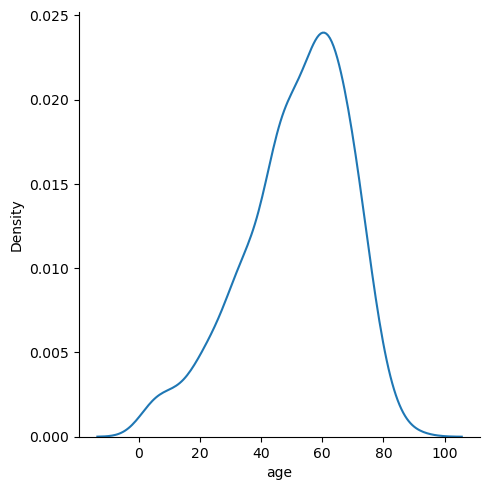

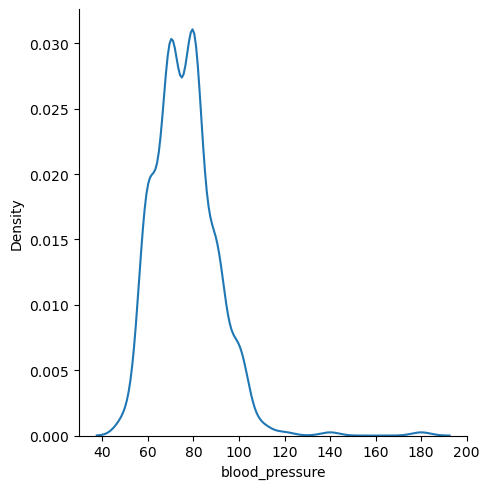

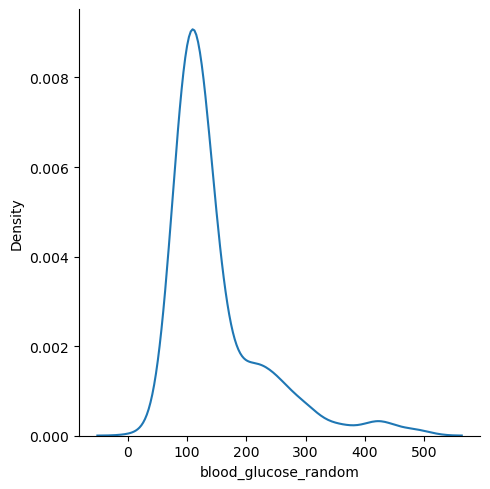

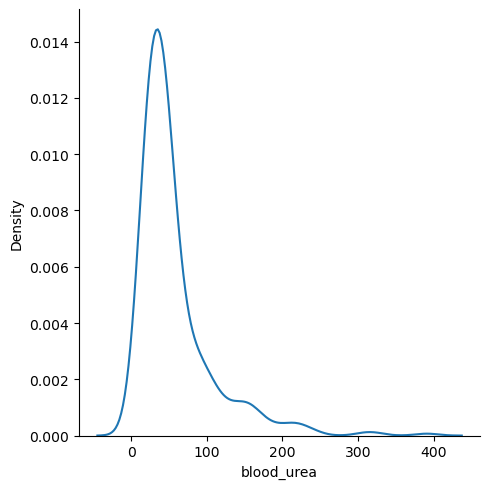

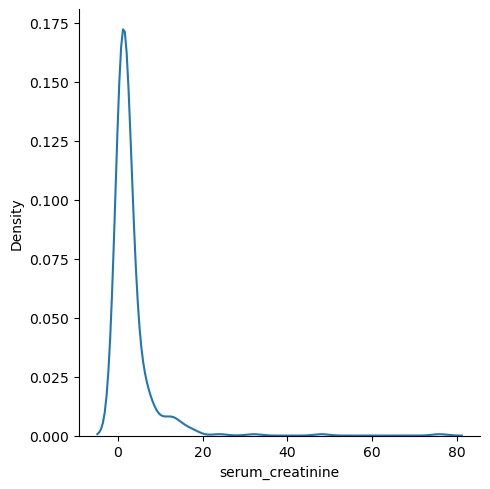

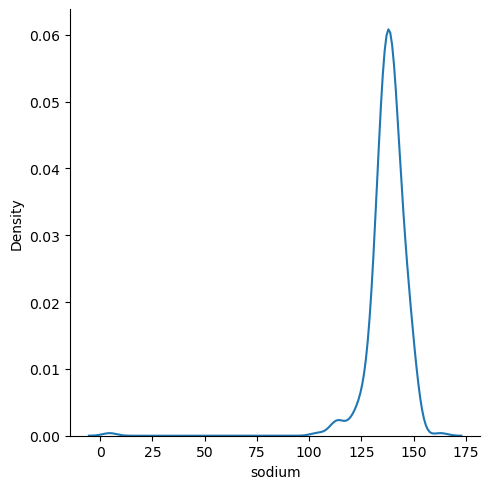

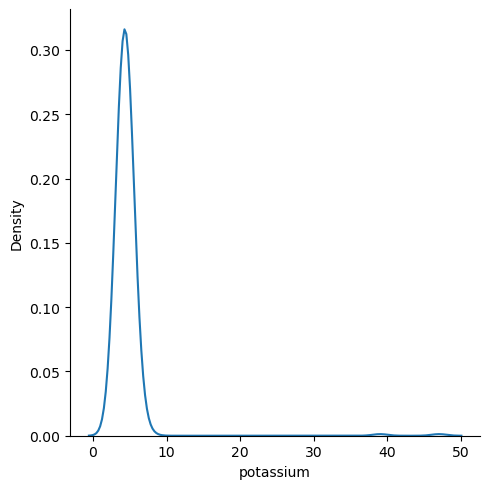

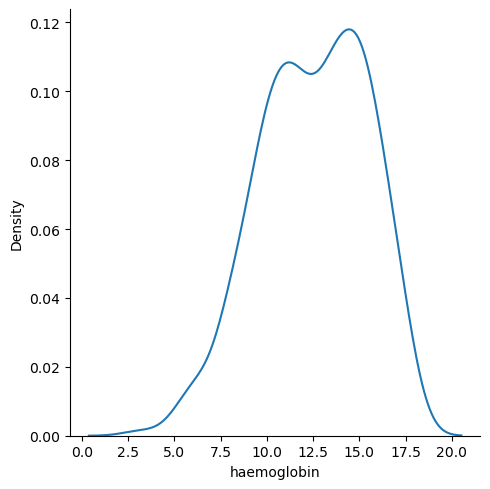

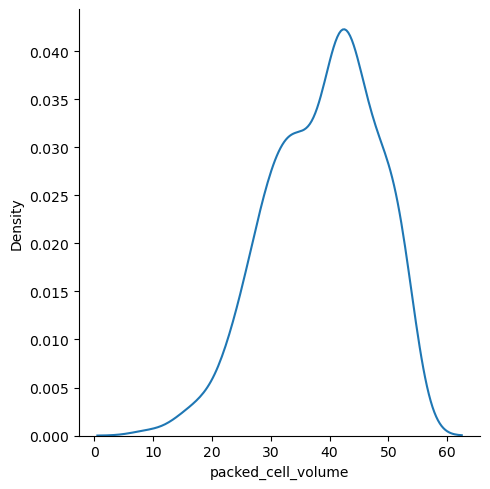

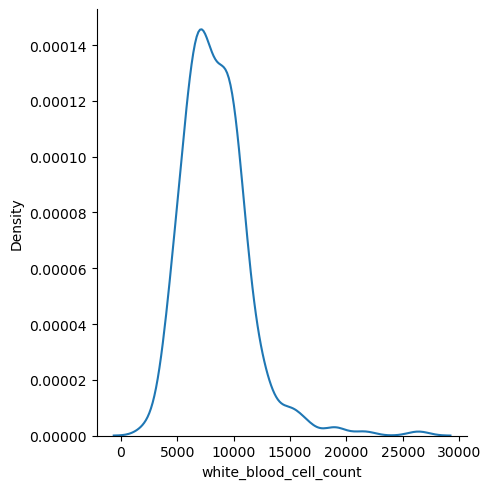

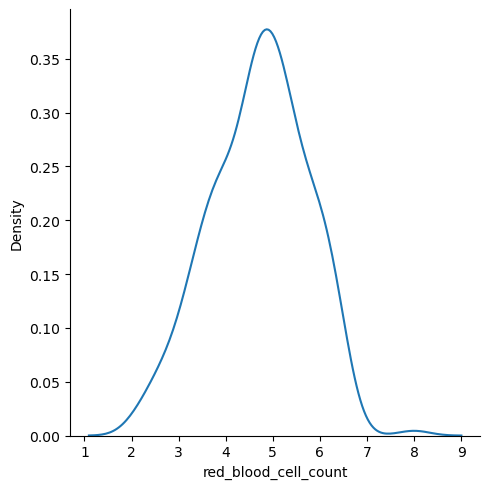

In [16]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for col in num_cols:
    sns.displot(chronic_df[col], kind = 'kde')

In [20]:
# let's see the cols in cat col list
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

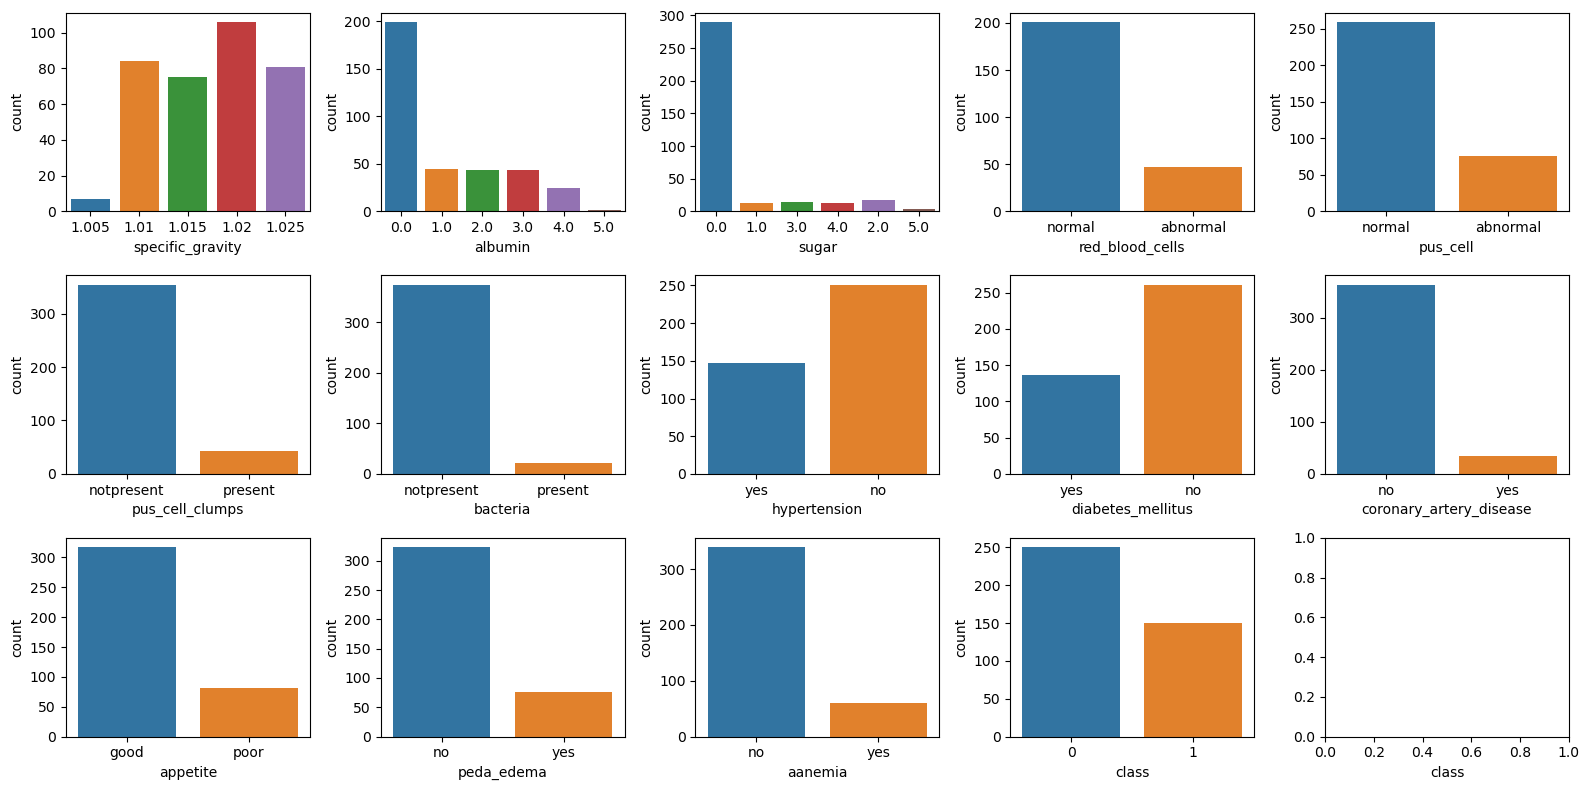

In [21]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot
for col, ax in zip(cat_cols, axes):
    sns.countplot(data = chronic_df,x = col, ax = ax )
    plt.xlabel(col)
    fig.tight_layout()

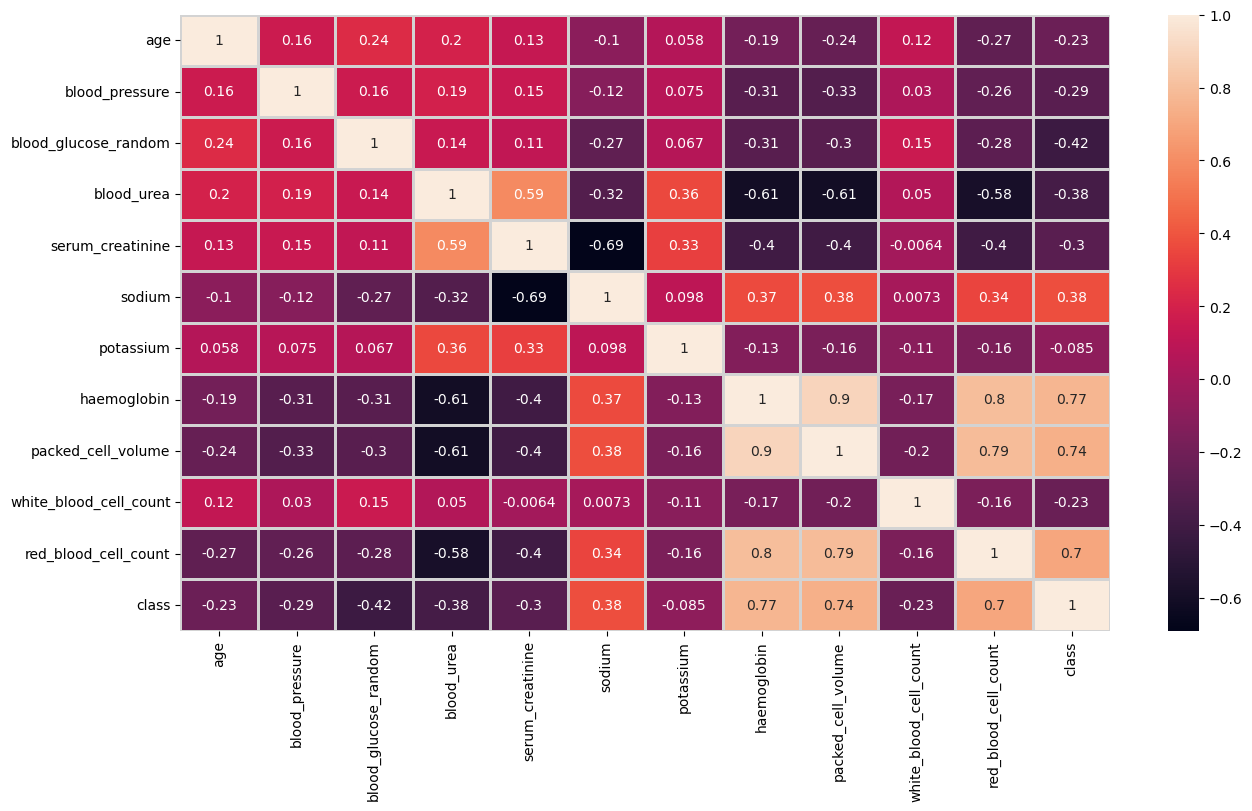

In [22]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(), annot= True, linewidths=2, linecolor= 'lightgrey')
plt.show()

In [23]:
# let's check count of null values in whole df
chronic_df.isnull().sum().sort_values(ascending= False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [24]:
# let's check count of null values in num_cols
chronic_df[num_cols].isna().sum().sort_values(ascending = False)

red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
haemoglobin                52
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
dtype: int64

In [25]:
# let's check count of null values in cat cols

chronic_df[cat_cols].isna().sum().sort_values(ascending = False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [26]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isnull()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample
    
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [27]:
# filling num_cols null values using random sampling method
for col in num_cols:
    random_value_imputation(col)

In [28]:
# let's check count of null values in num_cols again
chronic_df[num_cols].isnull().sum()

age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [29]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

In [30]:
# let's check count of null values in cat_cols again
chronic_df[cat_cols].isnull().sum()

specific_gravity           47
albumin                    46
sugar                      49
red_blood_cells             0
pus_cell                    0
pus_cell_clumps             4
bacteria                    4
hypertension                2
diabetes_mellitus           2
coronary_artery_disease     2
appetite                    1
peda_edema                  1
aanemia                     1
class                       0
dtype: int64

In [31]:
# filling cat nul values with mode treatment
for col in cat_cols:
    impute_mode(col)

In [32]:
chronic_df.head()

age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0          normal   
1   7.0            50.0             1.020      4.0    0.0          normal   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                 122.0  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   5.9   
2                31.0                  7500.0                   5.0   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0           yes                yes                       no      good   
1            no                 no                       no      good   
2            no                yes                       no      poor   
3           yes                 no                       no      poor   
4            no                 no                       no      good   

   peda_edema aanemia class  
0          no      no     0  
1          no      no     0  
2          no     yes     0  
3         yes     yes     0  
4          no      no     0  

[5 rows x 25 columns]

In [33]:
# check unique values in each cat col by looping over cat cols
for col in cat_cols:
    print(f"{col} has {chronic_df[col].nunique()} categories\n")

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [34]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols[3:]:
    chronic_df[col] = le.fit_transform(chronic_df[col])

In [35]:
# check chronic df after transforming cat cols
chronic_df.head()

age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0                 121.0  ...   
1         1                0         0                 122.0  ...   
2         1                0         0                 423.0  ...   
3         0                1         0                 117.0  ...   
4         1                0         0                 106.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   5.9   
2                31.0                  7500.0                   5.0   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   hypertension  diabetes_mellitus  coronary_artery_disease  appetite  \
0             1                  1                        0         0   
1             0                  0                        0         0   
2             0                  1                        0         1   
3             1                  0                        0         1   
4             0                  0                        0         0   

   peda_edema  aanemia  class  
0           0        0      0  
1           0        0      0  
2           0        1      0  
3           1        1      0  
4           0        0      0  

[5 rows x 25 columns]

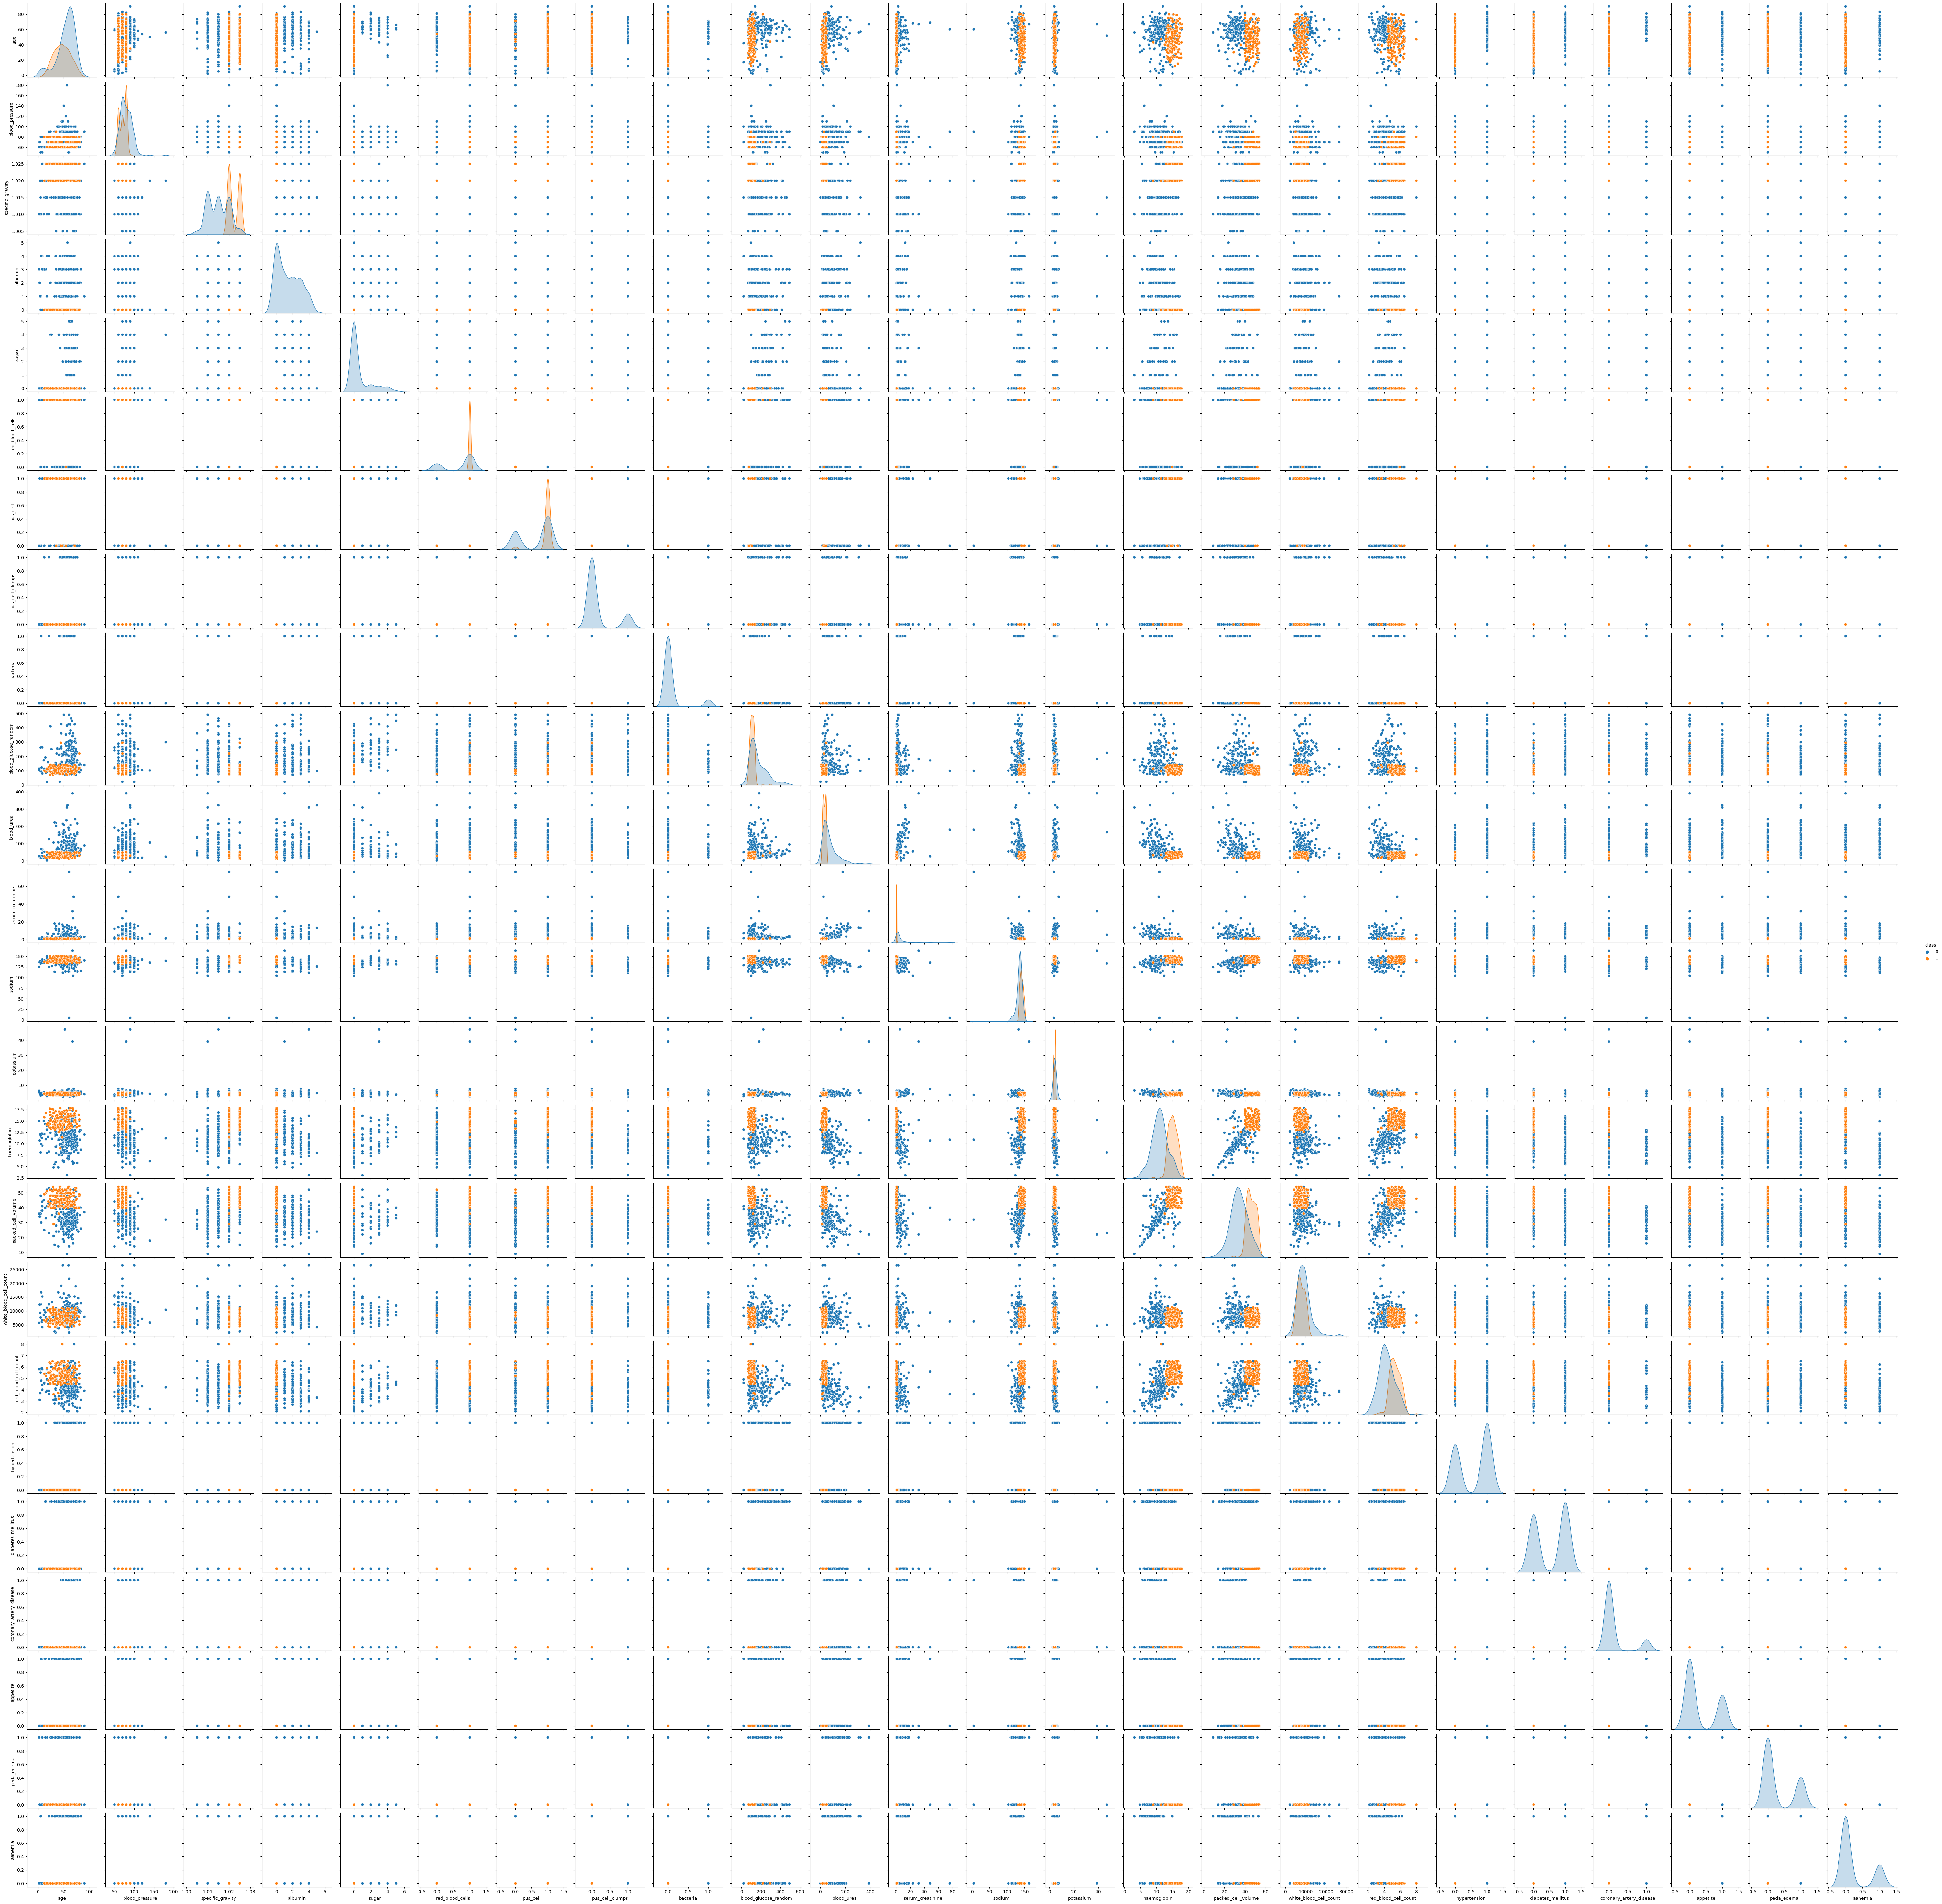

In [36]:
sns.pairplot(chronic_df, hue = 'class')

In [37]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class', axis = 1)
y = chronic_df['class']

In [38]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)

## **`Model Building`**

In [39]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)




# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is: {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN: {knn_acc}")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, knn.predict(X_test))}")
print(f"Classification Report: \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is: 0.7642857142857142
Test Accuracy of KNN: 0.625
Confusion Matrix: 
[[44 28]
 [17 31]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.61      0.66        72
           1       0.53      0.65      0.58        48

    accuracy                           0.62       120
   macro avg       0.62      0.63      0.62       120
weighted avg       0.64      0.62      0.63       120



In [40]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)



# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is: {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier: {dtc_acc}")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report: \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is: 1.0
Test Accuracy of Decision Tree Classifier: 0.9916666666666667
Confusion Matrix: 
[[72  0]
 [ 1 47]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [41]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

"""
Use this param
 {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

"""

grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs= -1, verbose= 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [42]:
# print best parameters and best score in grid search dtc
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
0.9857142857142858


In [43]:
# storing best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of Decision Tree Classifier is: {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier: {dtc_acc}")

print(f"Confusion Matrix: \n{confusion_matrix(y_test, dtc.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is: 0.9714285714285714
Test Accuracy of Decision Tree Classifier: 0.9583333333333334
Confusion Matrix: 
[[71  1]
 [ 4 44]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.98      0.92      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



In [44]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion= 'entropy', max_depth=11, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 3, n_estimators= 130)
rd_clf.fit(X_train, y_train)


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is: {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier: {rd_clf_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, rd_clf.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is: 1.0
Test Accuracy of Random Forest Classifier: 0.9916666666666667
Confusion Matrix: 
 [[72  0]
 [ 1 47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [45]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator= dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is: {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier: {ada_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, ada.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is: 1.0
Test Accuracy of Ada Boost Classifier: 1.0
Confusion Matrix: 
 [[72  0]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [46]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is: {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier: {gb_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, gb.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is: 1.0
Test Accuracy of Gradient Boosting Classifier: 0.9916666666666667
Confusion Matrix: 
 [[72  0]
 [ 1 47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [47]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)



# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))
print(f"Training Accuracy of Stochastic Gradient Boosting Classifier is: {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting Classifier: {sgb_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, sgb.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting Classifier is: 1.0
Test Accuracy of Stochastic Gradient Boosting Classifier: 0.9916666666666667
Confusion Matrix: 
 [[72  0]
 [ 1 47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [48]:
# import XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators =150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGBoost Classifier is: {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XGBoost Classifier: {xgb_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, xgb.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGBoost Classifier is: 1.0
Test Accuracy of XGBoost Classifier: 0.9916666666666667
Confusion Matrix: 
 [[72  0]
 [ 1 47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [ ]:
# pip install catboost

In [49]:
# import CatBoostClassifier
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))
print(f"Training Accuracy of Cat Boost Classifier is: {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier: {cat_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, cat.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, cat.predict(X_test))}")

Learning rate set to 0.005982
0:	learn: 0.6849413	total: 149ms	remaining: 2m 28s
1:	learn: 0.6772958	total: 150ms	remaining: 1m 14s
2:	learn: 0.6691638	total: 151ms	remaining: 50.2s
3:	learn: 0.6618341	total: 152ms	remaining: 38s
4:	learn: 0.6528130	total: 153ms	remaining: 30.5s
5:	learn: 0.6437936	total: 155ms	remaining: 25.6s
6:	learn: 0.6350753	total: 156ms	remaining: 22.1s
7:	learn: 0.6276364	total: 157ms	remaining: 19.4s
8:	learn: 0.6203727	total: 158ms	remaining: 17.4s
9:	learn: 0.6117470	total: 159ms	remaining: 15.7s
10:	learn: 0.6044978	total: 160ms	remaining: 14.4s
11:	learn: 0.5978671	total: 161ms	remaining: 13.3s
12:	learn: 0.5897508	total: 163ms	remaining: 12.3s
13:	learn: 0.5822356	total: 163ms	remaining: 11.5s
14:	learn: 0.5746554	total: 165ms	remaining: 10.8s
15:	learn: 0.5670050	total: 166ms	remaining: 10.2s
16:	learn: 0.5580536	total: 167ms	remaining: 9.64s
17:	learn: 0.5513217	total: 168ms	remaining: 9.16s
18:	learn: 0.5437965	total: 169ms	remaining: 8.72s
19:	learn: 

In [50]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)



# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))
print(f"Training Accuracy of Extra Trees Classifier is: {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier: {etc_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, etc.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is: 1.0
Test Accuracy of Extra Trees Classifier: 1.0
Confusion Matrix: 
 [[72  0]
 [ 0 48]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [55]:
# !pip install lightgbm

In [54]:
# import LGBMClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate= 1)
lgbm.fit(X_train, y_train)



# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is: {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier: {lgbm_acc}")

print(f"Confusion Matrix: \n {confusion_matrix(y_test, lgbm.predict(X_test))}")
print(f"Classification Report: \n {classification_report(y_test, lgbm.predict(X_test))}")

[LightGBM] [Info] Number of positive: 102, number of negative: 178
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 515
[LightGBM] [Info] Number of data points in the train set: 280, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.364286 -> initscore=-0.556811
[LightGBM] [Info] Start training from score -0.556811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

  File "E:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "E:\anaconda3\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "E:\anaconda3\Lib\subprocess.py", line 1509, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [57]:
# comparing all models accuracy by creating a df
models = pd.DataFrame({
    'Model': ['KNN', "Decision Tree Classifier", "Random Forest Classifier", "Ada Boost Classifier", 'Gradient Boosting Classifier', "Stochastic Gradient Boosting Classifier", "XgBoost", 'Cat Boost', 
              'Extra Trees Classifier'],
    "Score": [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})

models.sort_values(by = 'Score', ascending= False)

Model     Score
3                     Ada Boost Classifier  1.000000
8                   Extra Trees Classifier  1.000000
2                 Random Forest Classifier  0.991667
4             Gradient Boosting Classifier  0.991667
5  Stochastic Gradient Boosting Classifier  0.991667
6                                  XgBoost  0.991667
7                                Cat Boost  0.991667
1                 Decision Tree Classifier  0.958333
0                                      KNN  0.625000

## Conclusion:-

Based on the accuracy scores generated by training various classification models, we can arrive at the conclusion that we can use:-

1. Ada Boost Classifier
2. Extra Trees Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier

for developing the model as these algorithms exhibit highest accuracy while making predictions based on the features selected for training & testing the models.